In [29]:
# import statements
import pandas as pd

In [30]:
# load data
df = pd.read_csv('3D_Print_Jobs_cleaned.csv')
df

,Name,Select Printer,Slicer Project File,Printer Requested,User Email,Printer Note,Material 1 Qty,User Type,Material 1,Material 1 Cost/Unit,Printed On,Material 2 Qty,Material 2,Material 2 Cost/Unit,Printed On.1,Print Cost,Sliced by,Print Time (Hours),Print ID,Creation Log
0,FMEP Cubes 1,Komodo,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,bmdavidson2@wisc.edu,X1E - ABS White/ASA White,420.82,Graduate,Bambu Labs ABS,0.05,Bambu Labs,0.0,Bambu Labs ASA,0.05,Bambu Labs,21.04,User,14,8171785086,"Jan 6, 2025 12:12 PM"
1,AED_Drone_Parts_1,Tigress,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,lprodgers@wisc.edu,X1C - Black PLA/White PLA,55.00,Graduate,Bambu Labs PLA Matte,0.05,Bambu Labs,0.0,Bambu Labs PLA Matte,0.05,Bambu Labs,2.75,Makerspace Staff,2,8214378089,"Jan 10, 2025 1:36 PM"
2,AED_Drone_Parts_2,Master Shifu,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,lprodgers@wisc.edu,X1C - Blue PLA/Gray PLA,97.00,Graduate,Bambu Labs PLA Matte,0.05,Bambu Labs,0.0,Bambu Labs PLA Matte,0.05,Bambu Labs,4.85,User,3,8214392486,"Jan 10, 2025 1:38 PM"
3,Top-Down Mount v1,Master Oogway,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,sifferman@wisc.edu,X1C - White PLA/Purple PLA,274.64,Graduate,Bambu Labs PLA Matte,0.05,Bambu Labs,0.0,Bambu Labs PLA Matte,0.05,Bambu Labs,13.73,User,9,8238119583,"Jan 14, 2025 10:53 AM"
4,BES Base,Viper,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,baschmall@wisc.edu,X1C - White ASA/Teal ASA,36.50,Graduate,Bambu Labs PLA Matte,0.05,Bambu Labs,0.0,Bambu Labs PLA Matte,0.05,Bambu Labs,1.83,User,1,8269757333,"Jan 17, 2025 2:40 PM"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1925,highfreq_con,Viper,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,jzeng56@wisc.edu,X1C - White ASA/Teal ASA,61.98,Undergraduate,Bambu Labs PLA Matte,0.05,Bambu Labs,0.0,Bambu Labs PLA Matte,0.05,Bambu Labs,3.10,User,2,8825108477,"Mar 31, 2025 4:29 PM"
1926,test_toolz,Shen,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,jzeng56@wisc.edu,X1C - White ABS/Blue ABS,29.47,Undergraduate,Bambu Labs PLA-CF,0.05,Bambu Labs,0.0,Bambu Labs PLA Matte,0.05,Bambu Labs,1.47,User,1,8825200318,"Mar 31, 2025 4:40 PM"
1927,Noel suarez - Challenge 4 print,Kai,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,nisuarez@wisc.edu,X1C - Blue PLA-CF/Gray PLA-CF,184.55,Undergraduate,Bambu Labs PLA Matte,0.05,Bambu Labs,0.0,Bambu Labs PLA Matte,0.05,Bambu Labs,9.23,User,6,8823035854,"Mar 31, 2025 1:23 PM"
1928,WiSP nosecone,Ox,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,xli2599@wisc.edu,X1C - Black PLA-CF/Red PLA-CF,119.21,Undergraduate,Bambu Labs PLA Matte,0.05,Bambu Labs,0.0,Bambu Labs PLA Matte,0.05,Bambu Labs,5.96,User,5,8825252393,"Mar 31, 2025 4:47 PM"


np.float64(233.05)

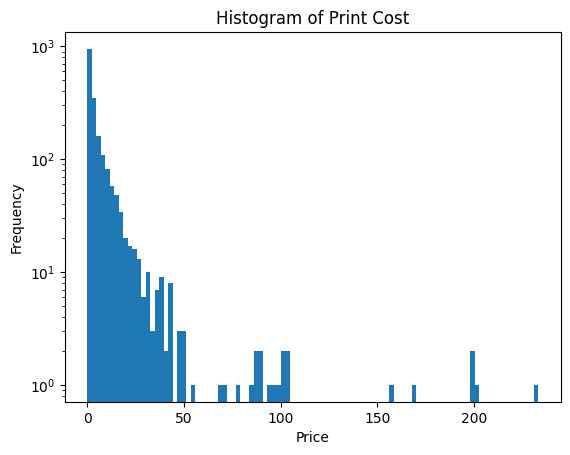

In [31]:
# Create histogram for pricing
ax = df['Print Cost'].plot.hist(bins=100, xlabel='Price', title='Histogram of Print Cost', logy=True)
fig = ax.get_figure()
fig.savefig('HistPrintCost.png')

df['Print Cost'].max()

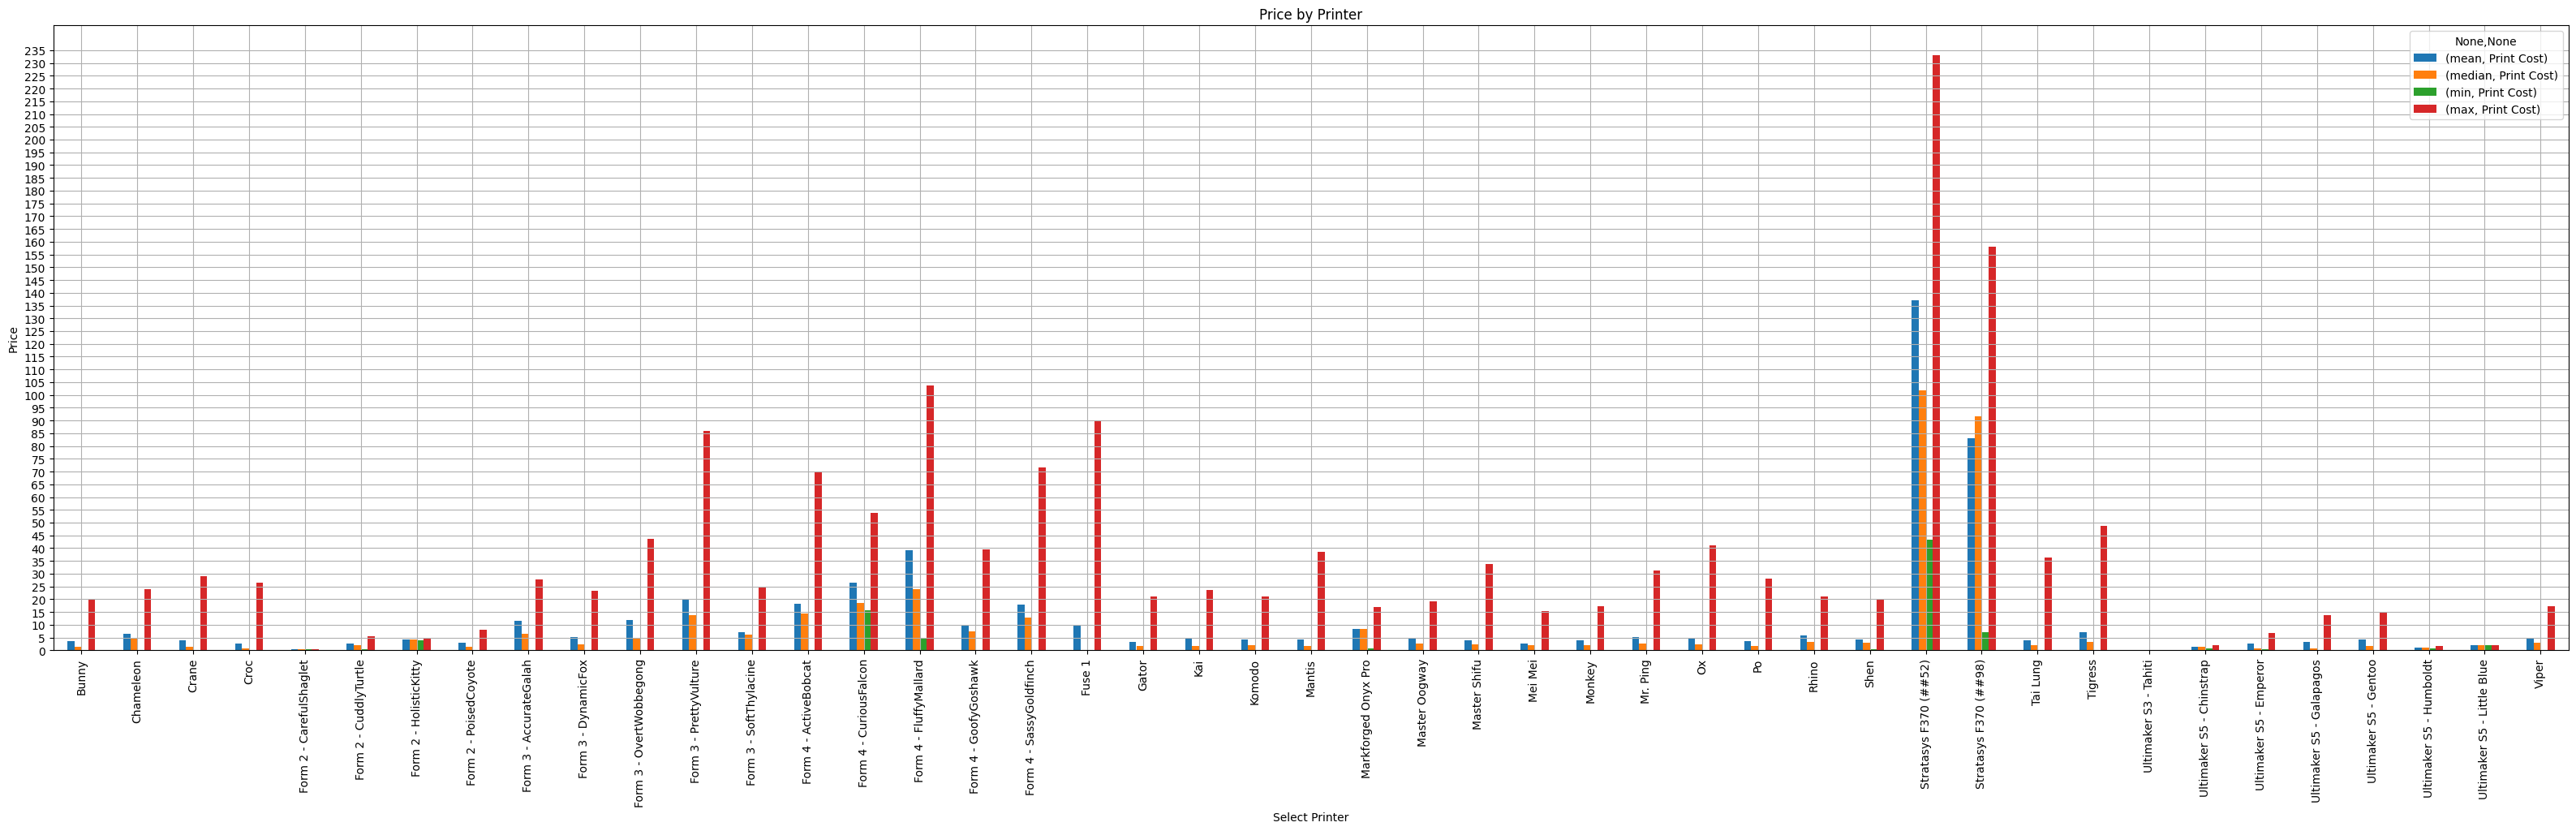

In [32]:
# Create bar chart for the average cost by printer
dfp = df.pivot_table(index='Select Printer', values='Print Cost', aggfunc=['mean', 'median', 'min', 'max'])

ax = dfp.plot.bar(figsize=(40,10), ylabel='Price', yticks=range(0,240,5), title='Price by Printer', grid=True)
fig = ax.get_figure()
fig.savefig('PriceByPrinter.png')

In [33]:
mat_1 = df['Material 1']
mat_1_qty = df['Material 1 Qty']

mat_2 = df['Material 2']
mat_2_qty = df['Material 2 Qty']

mats = list(mat_1.unique()) + list(mat_2.unique())
mats = list(dict.fromkeys(mats))
mat_usage = {}
for mat in mats:
    mat_usage[mat] = 0

length = len(df)
for i in range(length):
    mat_usage[ mat_1[i] ] += mat_1_qty[i]
    mat_usage[ mat_2[i] ] += mat_2_qty[i]

# Day of the Week

In [34]:
import datetime
import pandas as pd

In [35]:
# load data
df = pd.read_csv('3D_Print_Jobs_cleaned.csv')
df.head()

,Name,Select Printer,Slicer Project File,Printer Requested,User Email,Printer Note,Material 1 Qty,User Type,Material 1,Material 1 Cost/Unit,Printed On,Material 2 Qty,Material 2,Material 2 Cost/Unit,Printed On.1,Print Cost,Sliced by,Print Time (Hours),Print ID,Creation Log
0,FMEP Cubes 1,Komodo,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,bmdavidson2@wisc.edu,X1E - ABS White/ASA White,420.82,Graduate,Bambu Labs ABS,0.05,Bambu Labs,0.0,Bambu Labs ASA,0.05,Bambu Labs,21.04,User,14,8171785086,"Jan 6, 2025 12:12 PM"
1,AED_Drone_Parts_1,Tigress,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,lprodgers@wisc.edu,X1C - Black PLA/White PLA,55.00,Graduate,Bambu Labs PLA Matte,0.05,Bambu Labs,0.0,Bambu Labs PLA Matte,0.05,Bambu Labs,2.75,Makerspace Staff,2,8214378089,"Jan 10, 2025 1:36 PM"
2,AED_Drone_Parts_2,Master Shifu,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,lprodgers@wisc.edu,X1C - Blue PLA/Gray PLA,97.00,Graduate,Bambu Labs PLA Matte,0.05,Bambu Labs,0.0,Bambu Labs PLA Matte,0.05,Bambu Labs,4.85,User,3,8214392486,"Jan 10, 2025 1:38 PM"
3,Top-Down Mount v1,Master Oogway,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,sifferman@wisc.edu,X1C - White PLA/Purple PLA,274.64,Graduate,Bambu Labs PLA Matte,0.05,Bambu Labs,0.0,Bambu Labs PLA Matte,0.05,Bambu Labs,13.73,User,9,8238119583,"Jan 14, 2025 10:53 AM"
4,BES Base,Viper,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,baschmall@wisc.edu,X1C - White ASA/Teal ASA,36.50,Graduate,Bambu Labs PLA Matte,0.05,Bambu Labs,0.0,Bambu Labs PLA Matte,0.05,Bambu Labs,1.83,User,1,8269757333,"Jan 17, 2025 2:40 PM"


In [36]:
df['Creation Log'] = pd.to_datetime(df['Creation Log'])
df['Weekday'] = df['Creation Log'].dt.day_name()
df['Time'] = df['Creation Log'].dt.time
df['Hour'] = df['Creation Log'].dt.hour
df.head()

,Name,Select Printer,Slicer Project File,Printer Requested,User Email,Printer Note,Material 1 Qty,User Type,Material 1,Material 1 Cost/Unit,...,Material 2 Cost/Unit,Printed On.1,Print Cost,Sliced by,Print Time (Hours),Print ID,Creation Log,Weekday,Time,Hour
0,FMEP Cubes 1,Komodo,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,bmdavidson2@wisc.edu,X1E - ABS White/ASA White,420.82,Graduate,Bambu Labs ABS,0.05,...,0.05,Bambu Labs,21.04,User,14,8171785086,2025-01-06 12:12:00,Monday,12:12:00,12
1,AED_Drone_Parts_1,Tigress,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,lprodgers@wisc.edu,X1C - Black PLA/White PLA,55.00,Graduate,Bambu Labs PLA Matte,0.05,...,0.05,Bambu Labs,2.75,Makerspace Staff,2,8214378089,2025-01-10 13:36:00,Friday,13:36:00,13
2,AED_Drone_Parts_2,Master Shifu,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,lprodgers@wisc.edu,X1C - Blue PLA/Gray PLA,97.00,Graduate,Bambu Labs PLA Matte,0.05,...,0.05,Bambu Labs,4.85,User,3,8214392486,2025-01-10 13:38:00,Friday,13:38:00,13
3,Top-Down Mount v1,Master Oogway,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,sifferman@wisc.edu,X1C - White PLA/Purple PLA,274.64,Graduate,Bambu Labs PLA Matte,0.05,...,0.05,Bambu Labs,13.73,User,9,8238119583,2025-01-14 10:53:00,Tuesday,10:53:00,10
4,BES Base,Viper,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,baschmall@wisc.edu,X1C - White ASA/Teal ASA,36.50,Graduate,Bambu Labs PLA Matte,0.05,...,0.05,Bambu Labs,1.83,User,1,8269757333,2025-01-17 14:40:00,Friday,14:40:00,14


<Axes: title={'center': 'Frequnecy of Prints for each Weekday'}, xlabel='Weekday', ylabel='Frequency'>

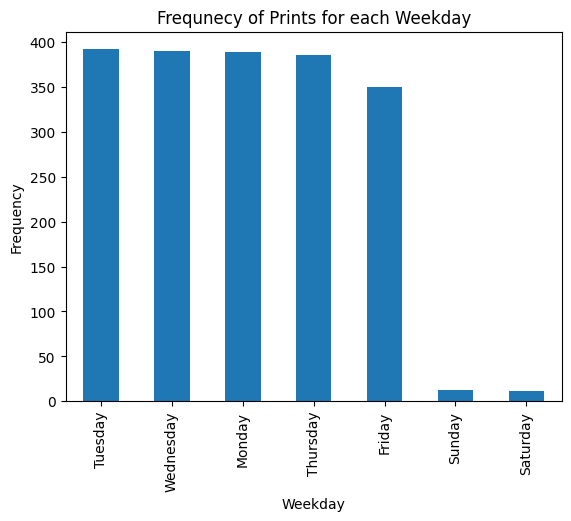

In [37]:
# histogram for weekday
df['Weekday'].value_counts().plot.bar(ylabel='Frequency', title='Frequnecy of Prints for each Weekday')

<Axes: title={'center': 'Incoming Print Requests on Monday'}, xlabel='Hour of the Day', ylabel='Frequency'>

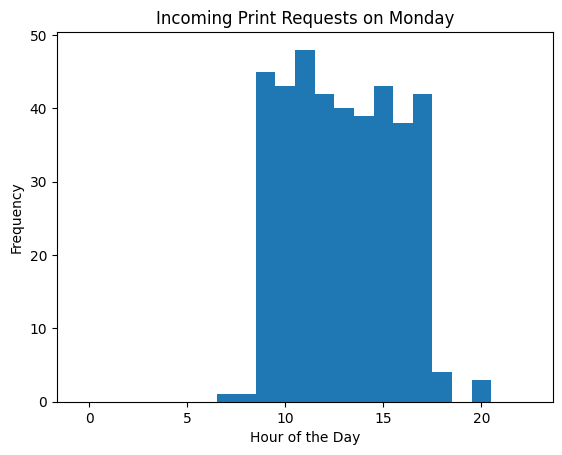

In [38]:
hour_bins = [ x-0.5 for x in range(0, 24) ]
df[ df['Weekday'] == 'Monday' ].Hour.plot.hist(bins=hour_bins, xlabel='Hour of the Day', title='Incoming Print Requests on Monday')

<Axes: title={'center': 'Incoming Print Requests on Tuesday'}, xlabel='Hour of the Day', ylabel='Frequency'>

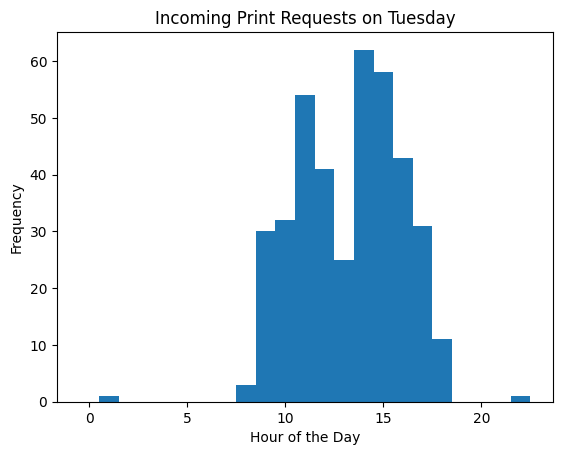

In [39]:
df[ df['Weekday'] == 'Tuesday' ].Hour.plot.hist(bins=hour_bins, xlabel='Hour of the Day', title='Incoming Print Requests on Tuesday')

<Axes: title={'center': 'Incoming Print Requests on Wednesday'}, xlabel='Hour of the Day', ylabel='Frequency'>

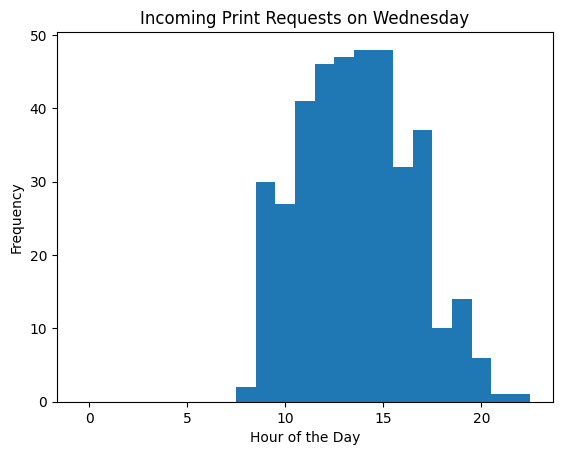

In [40]:
df[ df['Weekday'] == 'Wednesday' ].Hour.plot.hist(bins=hour_bins, xlabel='Hour of the Day', title='Incoming Print Requests on Wednesday')

<Axes: title={'center': 'Incoming Print Requests on Thursday'}, xlabel='Hour of the Day', ylabel='Frequency'>

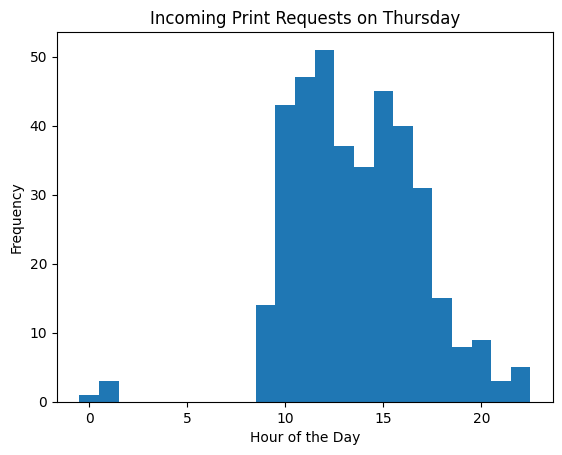

In [41]:
df[ df['Weekday'] == 'Thursday' ].Hour.plot.hist(bins=hour_bins, xlabel='Hour of the Day', title='Incoming Print Requests on Thursday')

<Axes: title={'center': 'Incoming Print Requests on Friday'}, xlabel='Hour of the Day', ylabel='Frequency'>

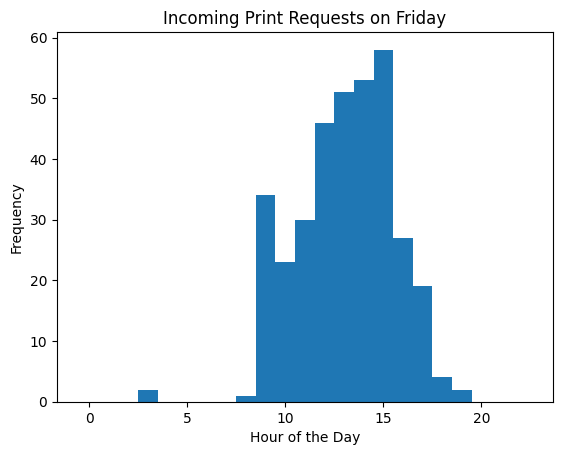

In [42]:
df[ df['Weekday'] == 'Friday'].Hour.plot.hist(bins=hour_bins, xlabel='Hour of the Day', title='Incoming Print Requests on Friday')

<Axes: title={'center': 'Incoming Print Requests on Saturday'}, xlabel='Hour of the Day', ylabel='Frequency'>

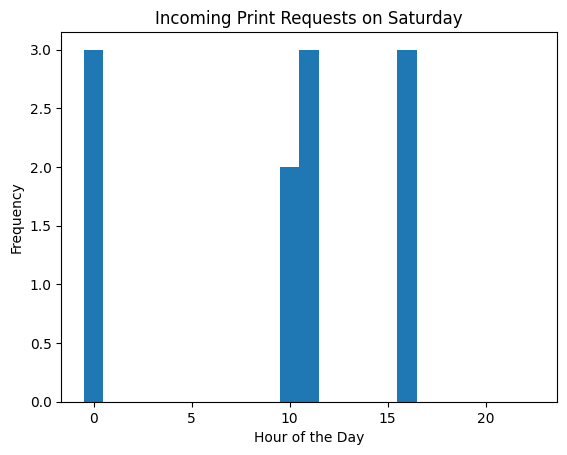

In [43]:
df[ df['Weekday'] == 'Saturday' ].Hour.plot.hist(bins=hour_bins, xlabel='Hour of the Day', title='Incoming Print Requests on Saturday')

<Axes: title={'center': 'Incoming Print Requests on Sunday'}, xlabel='Hour of the Day', ylabel='Frequency'>

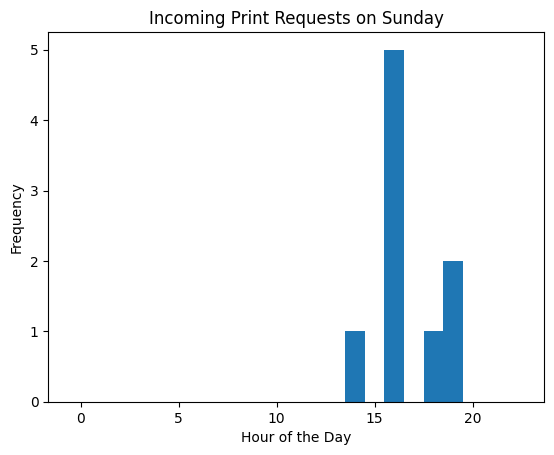

In [44]:
df[ df['Weekday'] == 'Sunday' ].Hour.plot.hist(bins=hour_bins, xlabel='Hour of the Day', title='Incoming Print Requests on Sunday')

In [45]:
df.head()

,Name,Select Printer,Slicer Project File,Printer Requested,User Email,Printer Note,Material 1 Qty,User Type,Material 1,Material 1 Cost/Unit,...,Material 2 Cost/Unit,Printed On.1,Print Cost,Sliced by,Print Time (Hours),Print ID,Creation Log,Weekday,Time,Hour
0,FMEP Cubes 1,Komodo,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,bmdavidson2@wisc.edu,X1E - ABS White/ASA White,420.82,Graduate,Bambu Labs ABS,0.05,...,0.05,Bambu Labs,21.04,User,14,8171785086,2025-01-06 12:12:00,Monday,12:12:00,12
1,AED_Drone_Parts_1,Tigress,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,lprodgers@wisc.edu,X1C - Black PLA/White PLA,55.00,Graduate,Bambu Labs PLA Matte,0.05,...,0.05,Bambu Labs,2.75,Makerspace Staff,2,8214378089,2025-01-10 13:36:00,Friday,13:36:00,13
2,AED_Drone_Parts_2,Master Shifu,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,lprodgers@wisc.edu,X1C - Blue PLA/Gray PLA,97.00,Graduate,Bambu Labs PLA Matte,0.05,...,0.05,Bambu Labs,4.85,User,3,8214392486,2025-01-10 13:38:00,Friday,13:38:00,13
3,Top-Down Mount v1,Master Oogway,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,sifferman@wisc.edu,X1C - White PLA/Purple PLA,274.64,Graduate,Bambu Labs PLA Matte,0.05,...,0.05,Bambu Labs,13.73,User,9,8238119583,2025-01-14 10:53:00,Tuesday,10:53:00,10
4,BES Base,Viper,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,baschmall@wisc.edu,X1C - White ASA/Teal ASA,36.50,Graduate,Bambu Labs PLA Matte,0.05,...,0.05,Bambu Labs,1.83,User,1,8269757333,2025-01-17 14:40:00,Friday,14:40:00,14


In [46]:
df['15m'] = df['Creation Log'].dt.floor('15min').dt.time  # back to just time if needed

<Axes: xlabel='15m'>

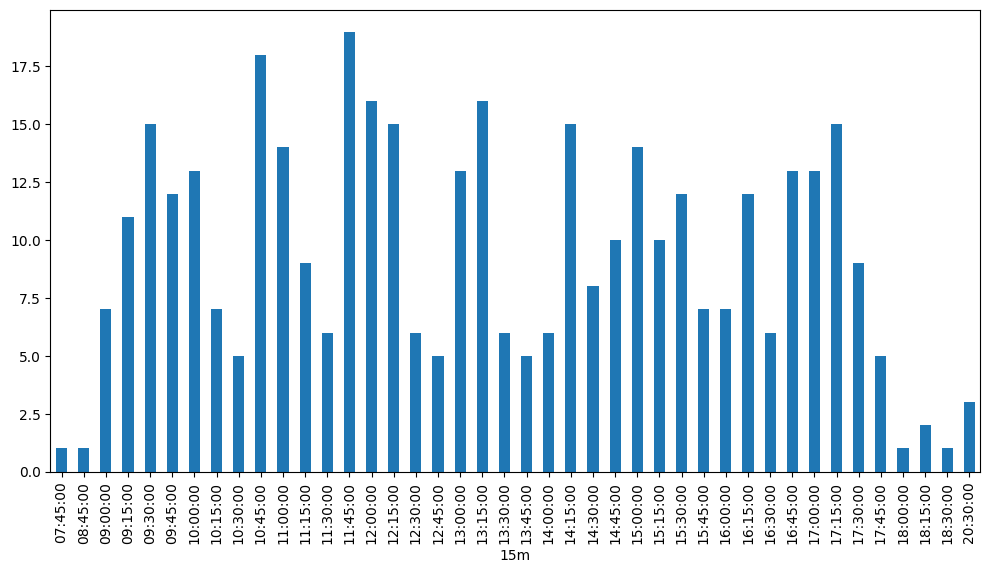

In [47]:
df[ df['Weekday'] == 'Monday' ]['15m'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))

<Axes: xlabel='15m'>

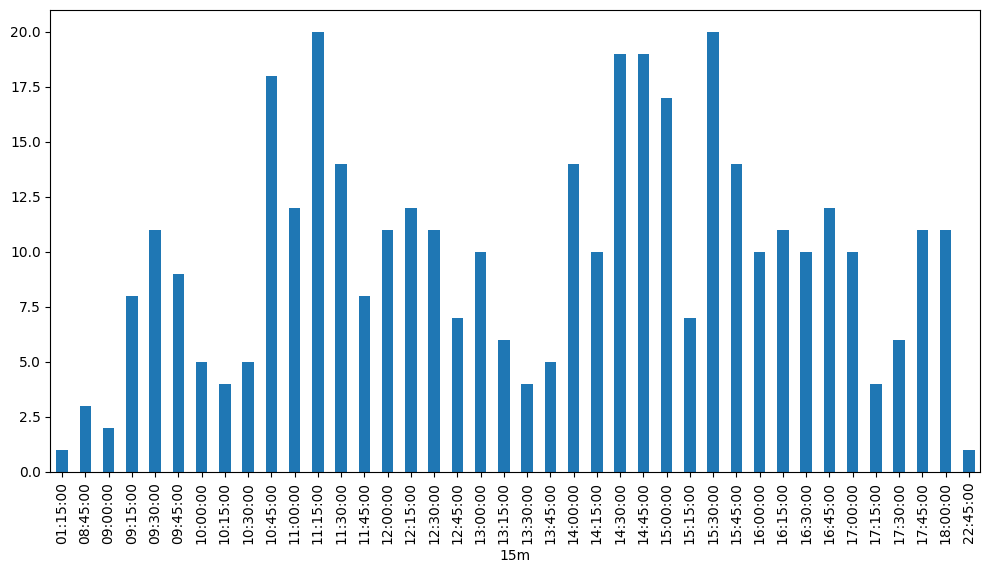

In [48]:
df[ df['Weekday'] == 'Tuesday' ]['15m'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))

<Axes: xlabel='15m'>

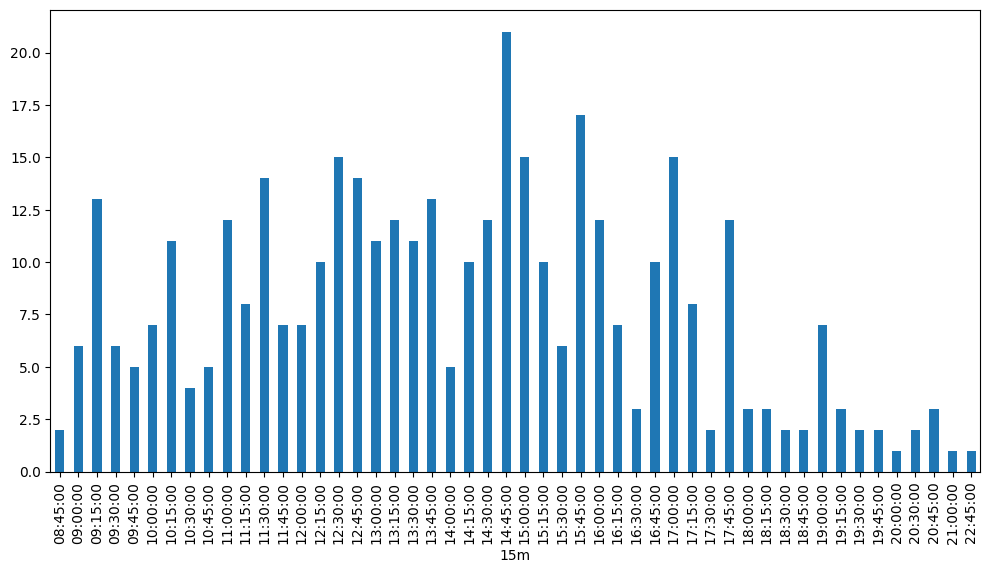

In [49]:
df[ df['Weekday'] == 'Wednesday' ]['15m'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))

In [50]:
df.head()

,Name,Select Printer,Slicer Project File,Printer Requested,User Email,Printer Note,Material 1 Qty,User Type,Material 1,Material 1 Cost/Unit,...,Printed On.1,Print Cost,Sliced by,Print Time (Hours),Print ID,Creation Log,Weekday,Time,Hour,15m
0,FMEP Cubes 1,Komodo,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,bmdavidson2@wisc.edu,X1E - ABS White/ASA White,420.82,Graduate,Bambu Labs ABS,0.05,...,Bambu Labs,21.04,User,14,8171785086,2025-01-06 12:12:00,Monday,12:12:00,12,12:00:00
1,AED_Drone_Parts_1,Tigress,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,lprodgers@wisc.edu,X1C - Black PLA/White PLA,55.00,Graduate,Bambu Labs PLA Matte,0.05,...,Bambu Labs,2.75,Makerspace Staff,2,8214378089,2025-01-10 13:36:00,Friday,13:36:00,13,13:30:00
2,AED_Drone_Parts_2,Master Shifu,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,lprodgers@wisc.edu,X1C - Blue PLA/Gray PLA,97.00,Graduate,Bambu Labs PLA Matte,0.05,...,Bambu Labs,4.85,User,3,8214392486,2025-01-10 13:38:00,Friday,13:38:00,13,13:30:00
3,Top-Down Mount v1,Master Oogway,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,sifferman@wisc.edu,X1C - White PLA/Purple PLA,274.64,Graduate,Bambu Labs PLA Matte,0.05,...,Bambu Labs,13.73,User,9,8238119583,2025-01-14 10:53:00,Tuesday,10:53:00,10,10:45:00
4,BES Base,Viper,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,baschmall@wisc.edu,X1C - White ASA/Teal ASA,36.50,Graduate,Bambu Labs PLA Matte,0.05,...,Bambu Labs,1.83,User,1,8269757333,2025-01-17 14:40:00,Friday,14:40:00,14,14:30:00


In [51]:
df['Date'] = df['Creation Log'].dt.date
dft = df[['Creation Log', 'Weekday', 'Date', 'Hour']]
dft['Day Time'] = dft['Creation Log'].dt.floor('1h')

# Now group by 'Date' and 'Hour' and count the entries
count_per_hour = dft.groupby(['Date', 'Hour']).size().reset_index(name='Count')
dft = dft.merge(count_per_hour, on=['Date', 'Hour'], how='left')
dft = dft.drop_duplicates(subset=['Date', 'Hour'])

/var/folders/f5/559_qhw57plby79lklrfrvm80000gn/T/ipykernel_37717/4213576976.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft['Day Time'] = dft['Creation Log'].dt.floor('1h')


In [52]:
dft = dft.drop(columns=['Creation Log'])

In [53]:
dft = dft.set_index('Day Time').sort_index()

# Remove first 2 and last row cause of incomplete data
dft = dft.iloc[2:-1]
dft

,Weekday,Date,Hour,Count
Day Time,,,,
2025-01-06 10:00:00,Monday,2025-01-06,10,1
2025-01-06 11:00:00,Monday,2025-01-06,11,2
2025-01-06 12:00:00,Monday,2025-01-06,12,4
2025-01-06 13:00:00,Monday,2025-01-06,13,2
2025-01-06 14:00:00,Monday,2025-01-06,14,5
...,...,...,...,...
2025-03-31 13:00:00,Monday,2025-03-31,13,6
2025-03-31 14:00:00,Monday,2025-03-31,14,3
2025-03-31 15:00:00,Monday,2025-03-31,15,2


In [54]:
idx = pd.date_range(start='2025-01-06 00:00:00', end='2025-03-31 23:00:00', freq='1h')
dft = dft.reindex(idx)

# Remove Date and Hour column that aren't necessary
dft = dft.drop(columns=['Date', 'Hour'])

# Fill new rows
dft['Weekday'] = dft.index.day_name()
dft = dft.fillna(value=0)

# Test Autoregression

In [55]:
from pandas.plotting import lag_plot

<Axes: xlabel='y(t)', ylabel='y(t + 336)'>

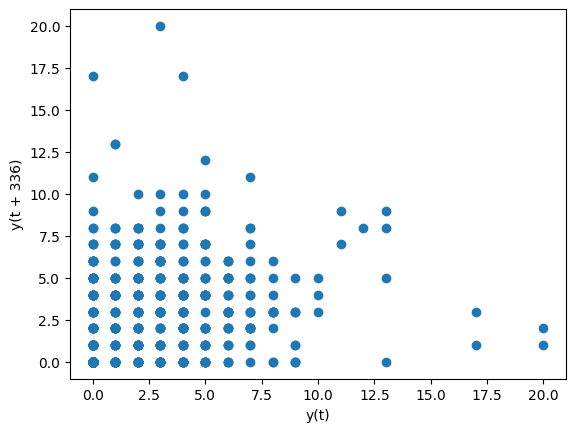

In [58]:
dftm = dft[ dft['Weekday'] == 'Monday']

# Use past 3 Mondays as reference
lag_plot(dft.Count, lag=336)

In [59]:
from statsmodels.tsa.ar_model import AutoReg

dft_train = dft.loc[:'2025-03-24 23:00:00']
dft_test = dft.loc['2025-03-25 00:00:00':]

ar = AutoReg(dft_train.Count, lags = 24*14) # input the time series
arfit = ar.fit()

In [60]:
# predict next Monday
yhat = arfit.predict(start='2025-03-25 00:00:00', end='2025-03-31 23:00:00')

/var/folders/f5/559_qhw57plby79lklrfrvm80000gn/T/ipykernel_37717/4232194052.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft_test["predictions"] = yhat


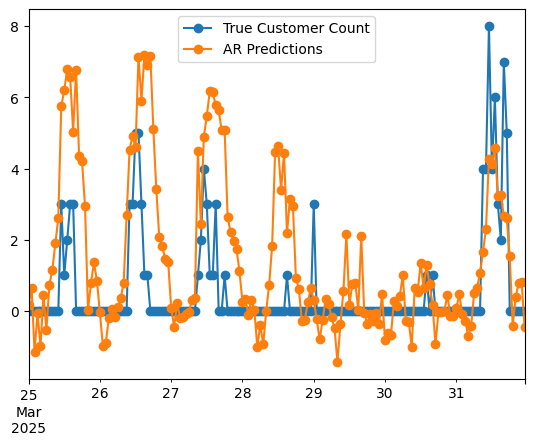

In [61]:
dft_test["predictions"] = yhat

ax = dft_test.Count.plot(marker='o', label="True Customer Count")
dft_test.predictions.plot(ax=ax, marker='o', label='AR Predictions');
ax.legend();